In [7]:
import pandas as pd
import folium
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt


In [8]:
# Load your CSV data
movement_data = pd.read_csv("../data/movements.csv", parse_dates=["datetime"])  # Replace with your file path
restaurant_data = pd.read_csv("../data/restaurants.csv")  # Replace with your file path

# Clean Data

In [9]:
movement_data.columns = movement_data.columns.str.lower()
restaurant_data.columns = restaurant_data.columns.str.lower()
restaurant_data.rename(columns={'restaurant id': 'restaurant_id'}, inplace=True)

print(movement_data.head())
print(restaurant_data.head())



             datetime    id   longitude   latitude
0 2020-01-01 00:00:00  I000 -122.335167  47.608013
1 2020-01-01 00:01:07  I000 -122.335166  47.608462
2 2020-01-01 00:01:37  I000 -122.335167  47.608432
3 2020-01-01 00:02:35  I000 -122.335166  47.608682
4 2020-01-01 00:04:05  I000 -122.335166  47.608841
  restaurant_id                   name  \
0          R000   Pullman Quick Stop 0   
1          R001   Pullman Quick Stop 1   
2          R002   Pullman Department 2   
3          R003    Pullman Groceries 3   
4          R004  Pullman Supercenter 4   

                                            category   longitude   latitude  
0                                 Convenience Stores -122.435908  47.621564  
1                                 Convenience Stores -122.297377  47.649300  
2                                  Department Stores -122.338057  47.666842  
3  Supermarkets/Other Grocery (Exc Convenience) Strs -122.242926  47.587846  
4                     Warehouse Clubs & Supercenter

In [10]:
print(movement_data.isnull().sum())
print(restaurant_data.isnull().sum())

datetime     0
id           0
longitude    0
latitude     0
dtype: int64
restaurant_id    0
name             0
category         0
longitude        0
latitude         0
dtype: int64


# Exploratory Data Analysis

In [18]:
# How many people
print(len(movement_data.groupby('id')))

10


In [27]:
# How many entries per person
print(movement_data.groupby('id').count().head(10))

      datetime  longitude  latitude
id                                 
I000    526301     526301    526301
I001    525745     525745    525745
I002    526180     526180    526180
I003    526591     526591    526591
I004    526238     526238    526238
I005    525837     525837    525837
I006    526184     526184    526184
I007    526330     526330    526330
I008    526492     526492    526492
I009    526170     526170    526170


In [11]:
# Haversine distance function (Earth radius in kilometers)
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of Earth in kilometers
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

10


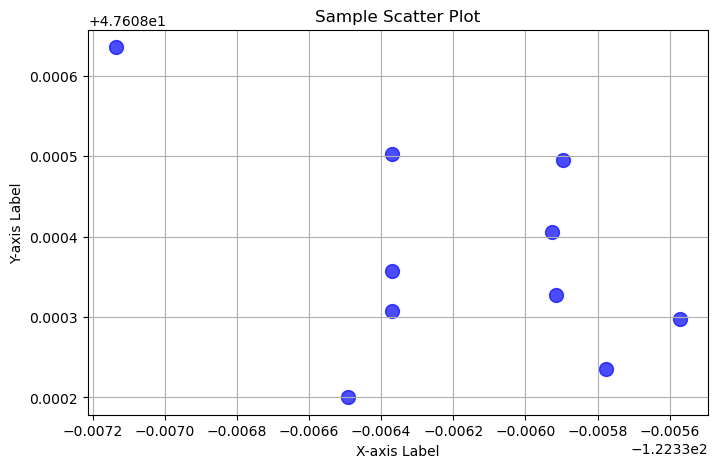

In [16]:
# Find which people move a lot
centroid = movement_data.groupby('id').agg({'longitude': 'mean', 'latitude': 'mean'}).reset_index()
centroid.columns = ['id', 'centroid_longitude', 'centroid_latitude']

# Step 2: Merge centroid back to the original DataFrame
merged_df = pd.merge(movement_data, centroid, on='id')


# Create scatter plot
plt.figure(figsize=(8, 5))  # Optional: set figure size
plt.scatter(centroid['centroid_longitude'], centroid['centroid_latitude'], color='blue', marker='o', s=100, alpha=0.7)

# Add title and labels
plt.title('Sample Scatter Plot')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

# Step 3: Calculate the distance from each movement to the centroid
# merged_df['distance_from_centroid'] = merged_df.apply(
#     lambda row: haversine(
#         row['longitude'],
#         row['latitude'],
#         row['centroid_longitude'],
#         row['centroid_latitude']
#     ),
#     axis=1
# )

In [ ]:


# Define a function to check if each movement is near a restaurant
def is_near_restaurant(movement, restaurants, threshold_km=0.5):
    # Ensure 'longitude' and 'latitude' exist in movement
    if 'longitude' not in movement or 'latitude' not in movement:
        raise ValueError("Movement must contain 'longitude' and 'latitude' keys.")

    # Iterate over the rows of the restaurants DataFrame
    for index, restaurant in restaurants.iterrows():
        # Calculate the distance using the haversine function
        distance = haversine(movement['longitude'], movement['latitude'],
                             restaurant['longitude'], restaurant['latitude'])
        
        # Check if the distance is within the threshold
        if distance <= threshold_km:
            return True, restaurant['restaurant_id']  # Return True and the restaurant ID

    return False, None  # Return False and None if no nearby restaurant is found


# Apply function to each movement and create a column indicating restaurant visits
# movement_data['restaurant_id'] = movement_data.apply(
#     lambda row: foo(count, row, restaurant_data), axis=1 
# )
for i in range(0, 100):
    person_id = movement_data.head(1)['id']
    print(f'{person_id}: {is_near_restaurant(movement_data.iloc[i], restaurant_data)[1]}')


# Loop through each row in the movement DataFrame
# for index, movement in movement_data.iterrows():
#     is_near, restaurant_id = is_near_restaurant(movement, restaurant_data)
#     print(f"Movement ID: {movement['id']} - Is near a restaurant? {is_near}, Restaurant ID: {restaurant_id}")